## Reading File 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
dataStates = pd.read_csv(url)

url = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv"
dataCities = pd.read_csv(url)

<h2 style='color:#ff335f'> Before removing noisy data </h2>

### dataCities

In [3]:
dataCities.isnull().sum()

country                             0
state                               0
city                                0
ibgeID                              0
cod_RegiaoDeSaude                  26
name_RegiaoDeSaude                 26
deaths                              0
totalCases                          0
deaths_per_100k_inhabitants         0
totalCases_per_100k_inhabitants     0
deaths_by_totalCases                0
_source                             0
date                                0
newCases                            0
newDeaths                           0
last_info_date                      0
dtype: int64

### dataStates

In [4]:
dataStates.isnull().sum()

epi_week                                     0
date                                         0
country                                      0
state                                        0
city                                         0
newDeaths                                    0
deaths                                       0
newCases                                     0
totalCases                                   0
deathsMS                                     0
totalCasesMS                                 0
deaths_per_100k_inhabitants                  0
totalCases_per_100k_inhabitants              0
deaths_by_totalCases                         0
recovered                                  643
suspects                                  2544
tests                                     1344
tests_per_100k_inhabitants                1344
vaccinated                                8731
vaccinated_per_100k_inhabitants           8731
vaccinated_second                         9411
vaccinated_se

<h2 style='color:#ff335f'> Noisy Data </h2>

### dataCities

<span style='color:#3385ff'> **Remove column useless** </span>

In [5]:
del dataCities['name_RegiaoDeSaude']
del dataCities['cod_RegiaoDeSaude']
del dataCities['last_info_date']
del dataCities['_source']
del dataCities['country']

### dataStates

<span style='color:#3385ff'> **Remove column useless** </span>

In [6]:
del dataStates['country']
del dataStates['epi_week']
del dataStates['suspects']
del dataStates['vaccinated_second']
del dataStates['vaccinated_second_per_100k_inhabitants']
del dataStates['tests']
del dataStates['tests_per_100k_inhabitants']

<span style='color:#3385ff'> **Fill Nan values** </span>

In [7]:
dataStates['recovered'].fillna(value=dataStates['recovered'].mean(), inplace=True)

In [8]:
dataStates['vaccinated'].fillna(value=0, inplace=True)
dataStates['vaccinated_per_100k_inhabitants'].fillna(value=0, inplace=True)

 <h3 style='color:#ff335f'> After removing noisy data </h3>

### dataCities

In [9]:
dataCities.isnull().sum()

state                              0
city                               0
ibgeID                             0
deaths                             0
totalCases                         0
deaths_per_100k_inhabitants        0
totalCases_per_100k_inhabitants    0
deaths_by_totalCases               0
date                               0
newCases                           0
newDeaths                          0
dtype: int64

### dataStates

In [10]:
dataStates.isnull().sum()

date                               0
state                              0
city                               0
newDeaths                          0
deaths                             0
newCases                           0
totalCases                         0
deathsMS                           0
totalCasesMS                       0
deaths_per_100k_inhabitants        0
totalCases_per_100k_inhabitants    0
deaths_by_totalCases               0
recovered                          0
vaccinated                         0
vaccinated_per_100k_inhabitants    0
dtype: int64

## Add regions

In [11]:
NORTE = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
NORDESTE = ['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
CENTRO = ['MT', 'GO', 'DF', 'MS']
SUDESTE = ['SP', 'MG', 'ES', 'RJ']
SUL = ['PR', 'SC', 'RS']

def regions(x):
    if x in NORTE:
        return 'NORTE'
    elif x in NORDESTE:
        return 'NORDESTE'
    elif x in CENTRO:
        return 'CENTRO-OESTE'
    elif x in SUL:
        return 'SUL'
    elif x in SUDESTE:
        return 'SUDESTE'

### dataStates

In [12]:
dataStates['regions'] = dataStates['state'].apply(regions)

### dataCities

In [13]:
dataCities['regions'] = dataCities['state'].apply(regions)

## Data Visualization 

In [14]:
estados = dataStates.groupby('state')
estados.size()

state
AC       428
AL       437
AM       432
AP       425
BA       439
CE       429
DF       438
ES       439
GO       433
MA       425
MG       437
MS       431
MT       425
PA       427
PB       427
PE       433
PI       426
PR       433
RJ       440
RN       433
RO       425
RR       424
RS       435
SC       433
SE       431
SP       449
TO       427
TOTAL    449
dtype: int64

<AxesSubplot:xlabel='state'>

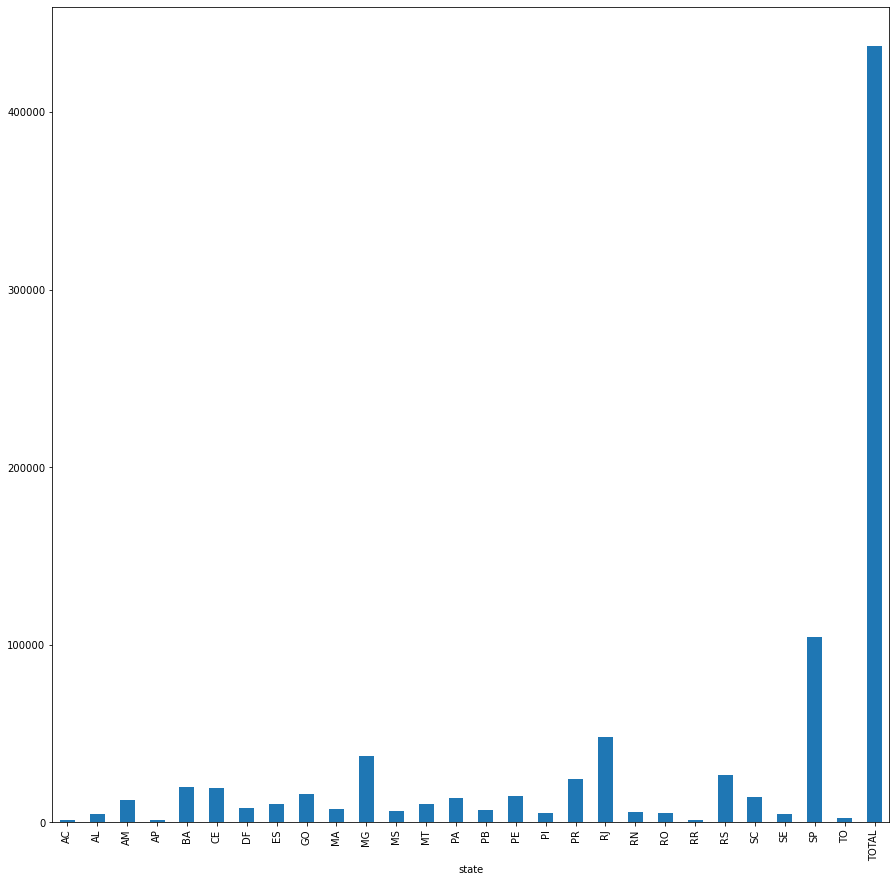

In [15]:
a = estados['deaths'].max()
a.plot.bar(figsize=(15,15))

<AxesSubplot:xlabel='state'>

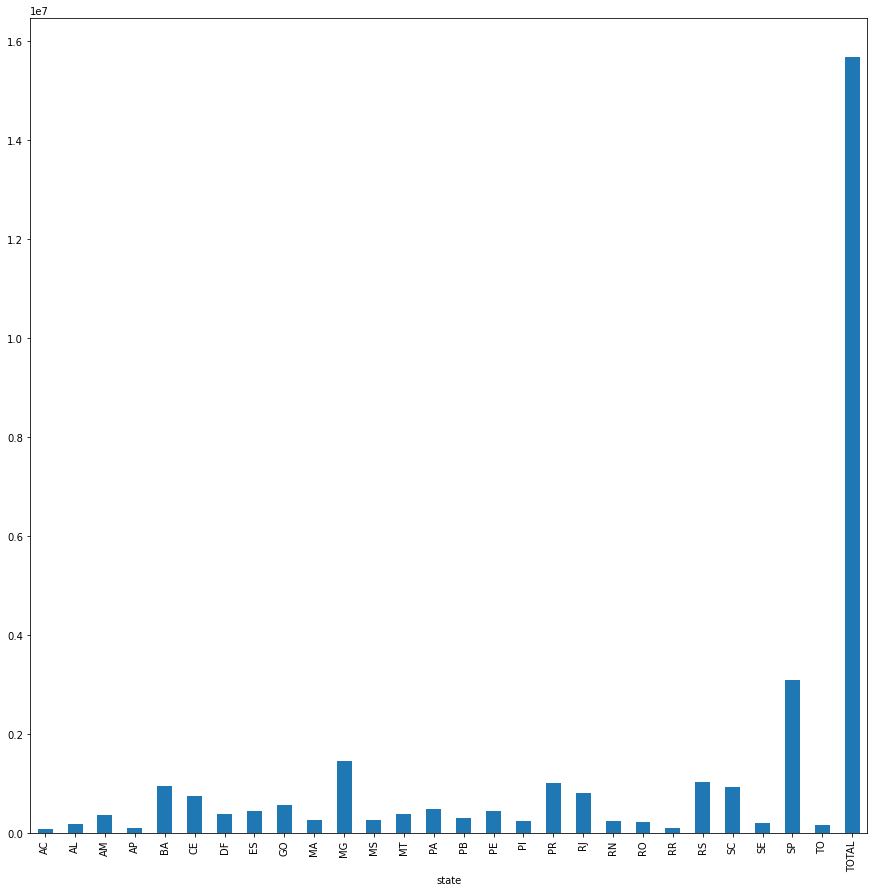

In [16]:
a = estados['totalCases'].max()
a.plot.bar(figsize=(15,15))

## Alagoas 

In [17]:
alagoas = dataCities[dataCities['state'] == 'AL']

### Number of accumulated deaths in Alagoas

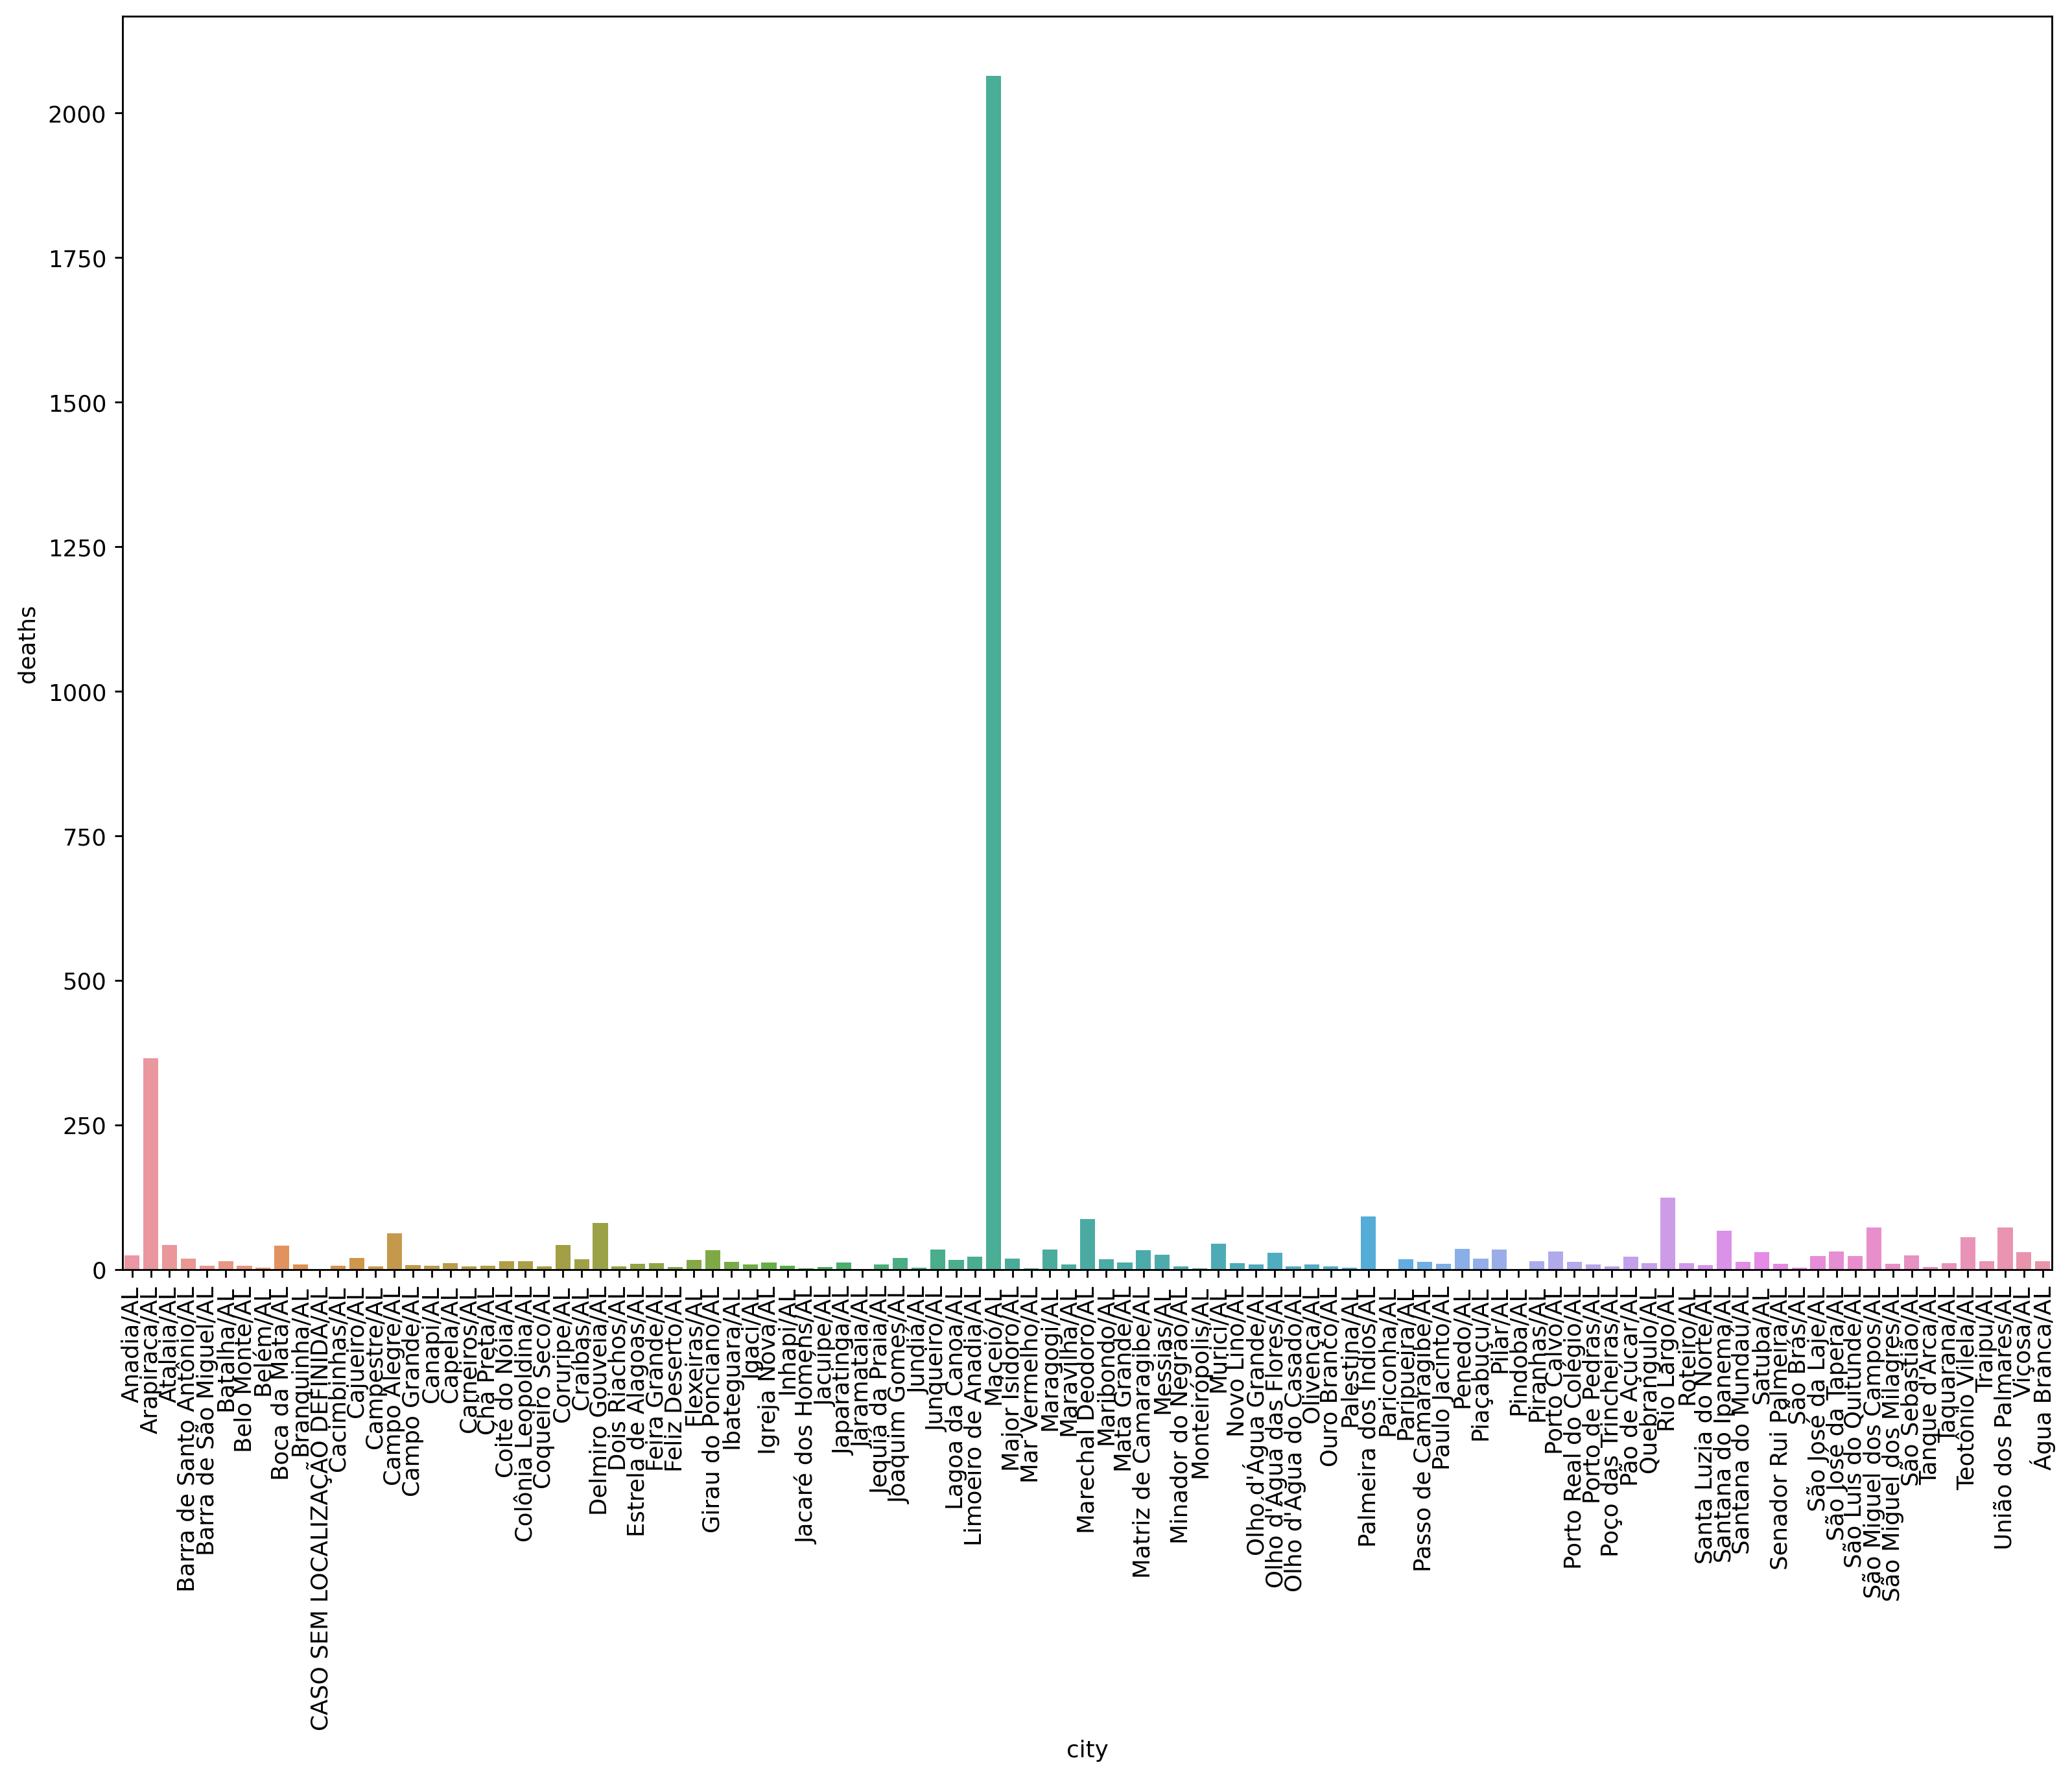

In [21]:
# temp = alagoas[alagoas['date'] == "2021-05-17"]

plt.figure(figsize=(15,10), dpi=256)
sns.barplot(x='city',y='deaths',data=alagoas)
plt.xticks(rotation=90)
plt.show()

### Accumulated Cases in Alagoas

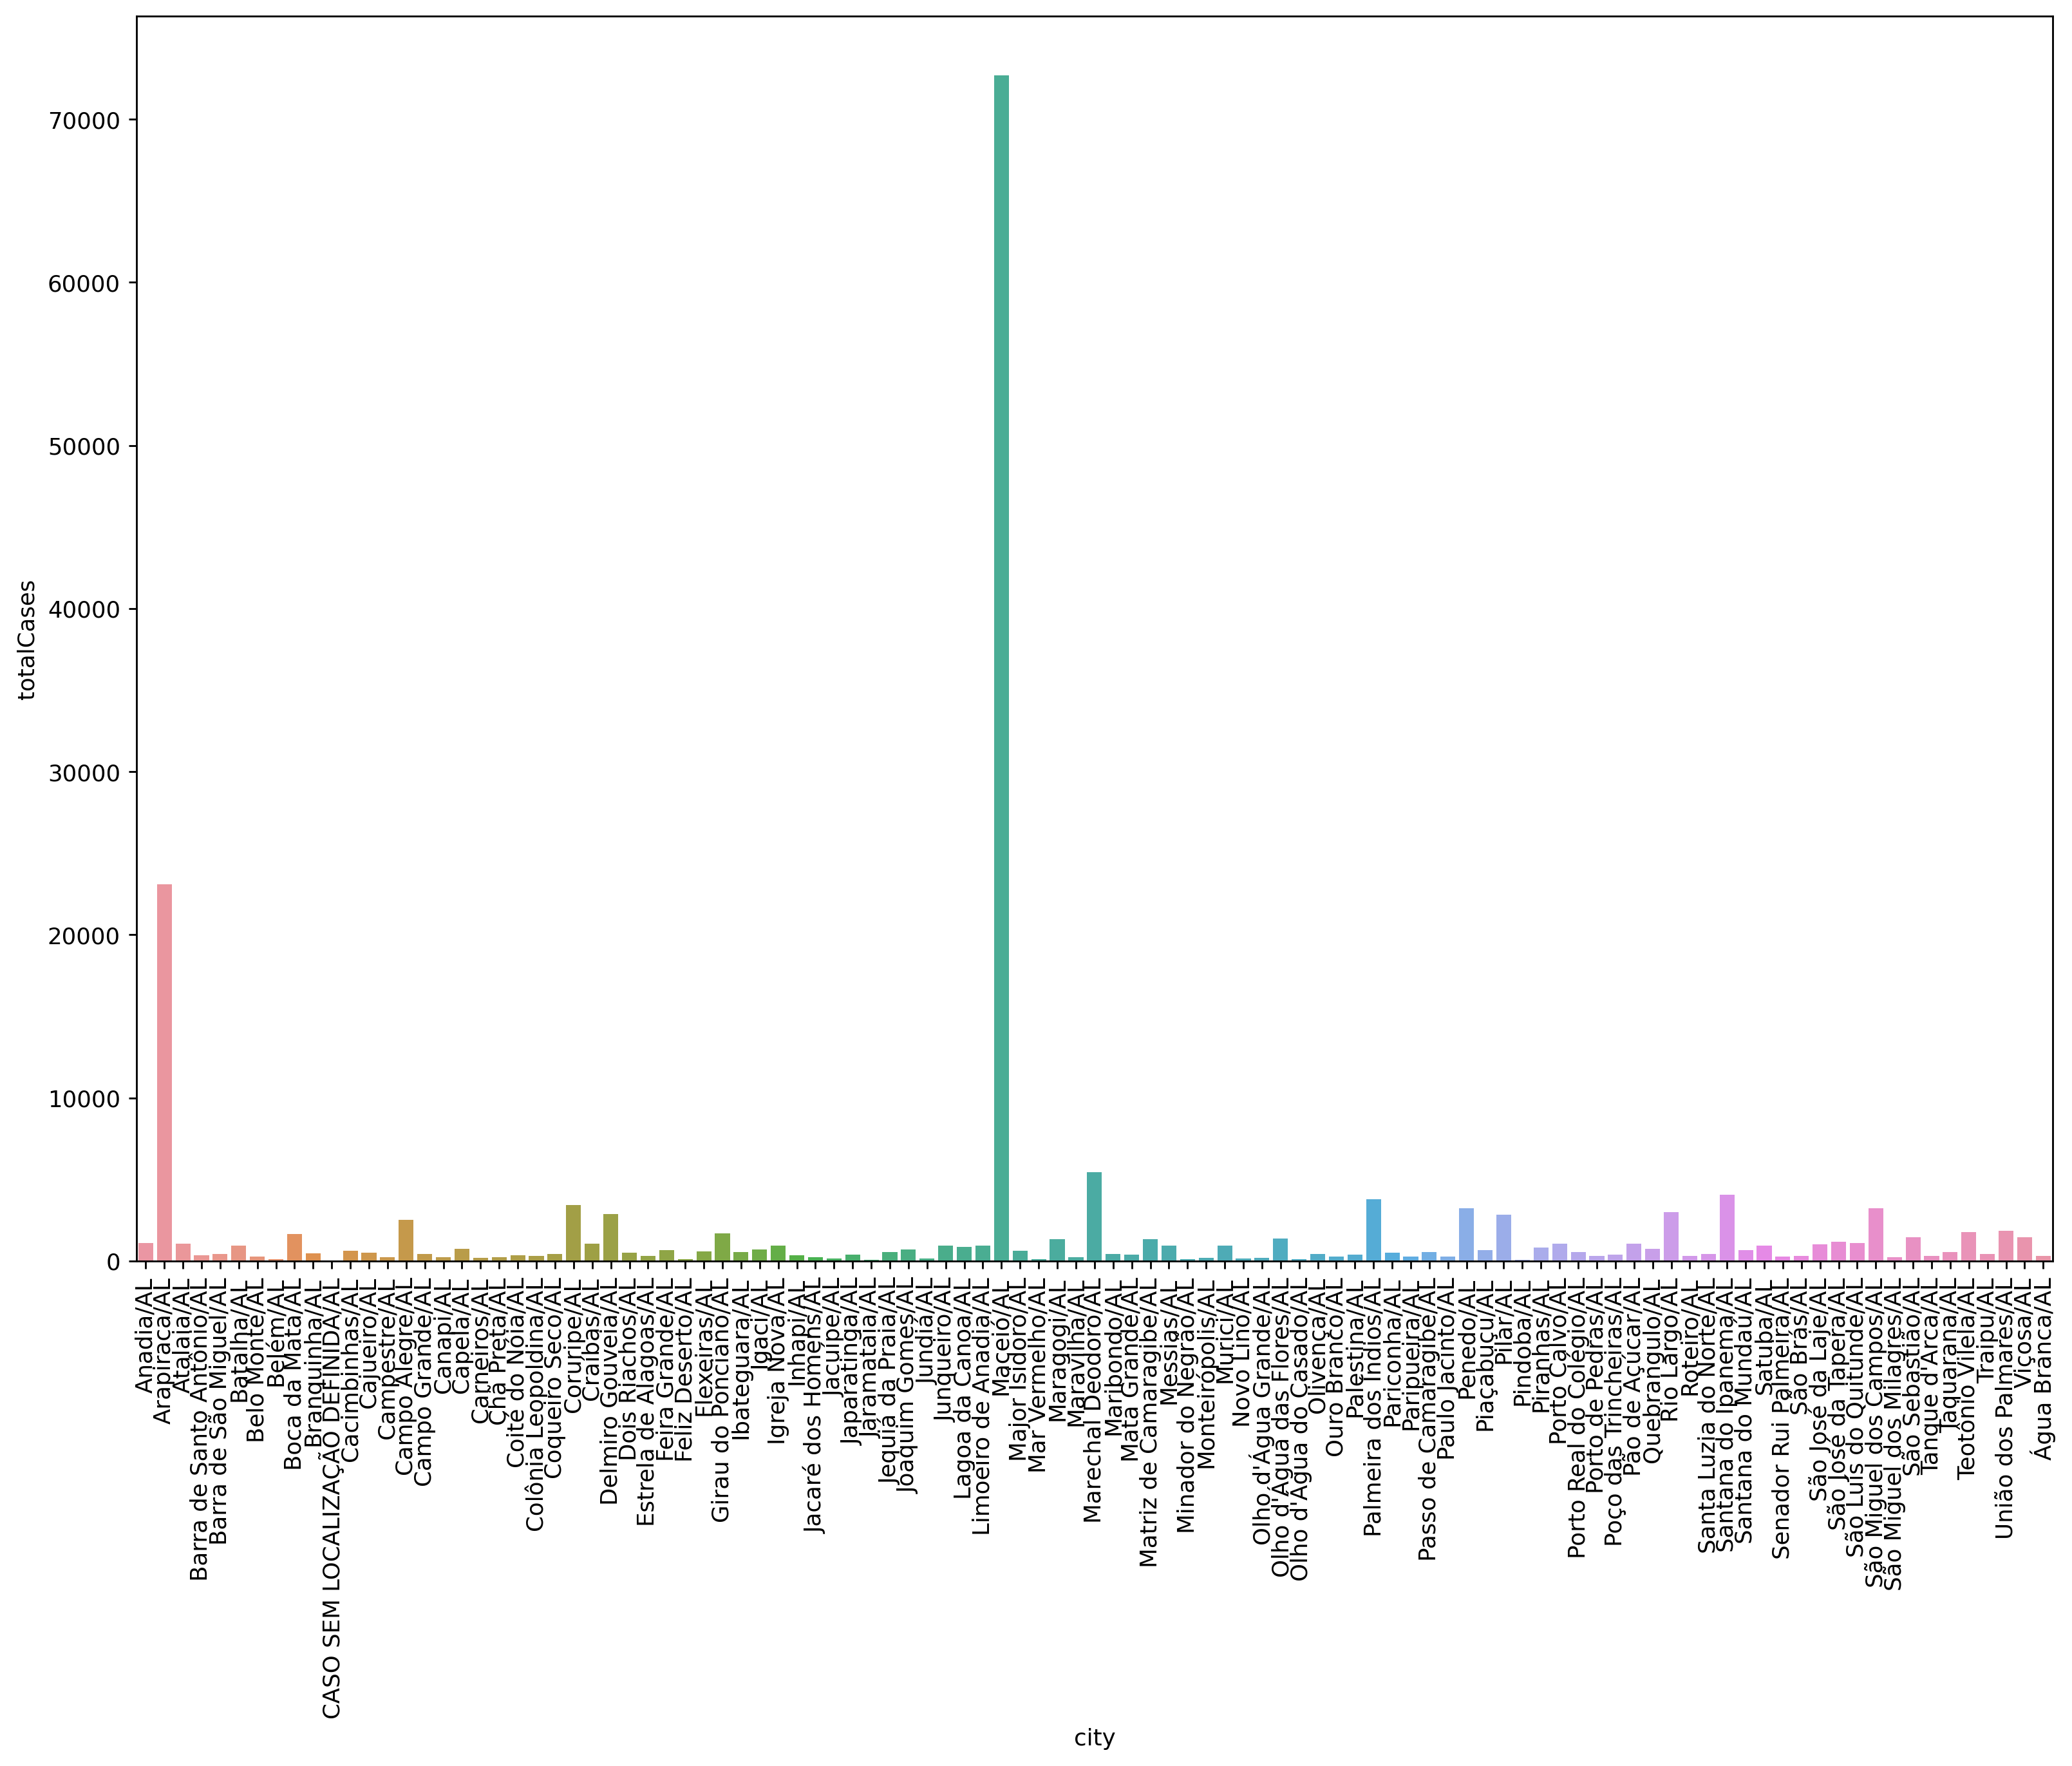

In [19]:
plt.figure(figsize=(15,10), dpi=256)
sns.barplot(x='city',y='totalCases',data=alagoas)
plt.xticks(rotation=90)
plt.show()

## Data Analyzing

In [22]:
dataStates.sort_values(by='totalCases', axis=0, inplace=True, ascending=False)

### New Cases x New Deaths by regions

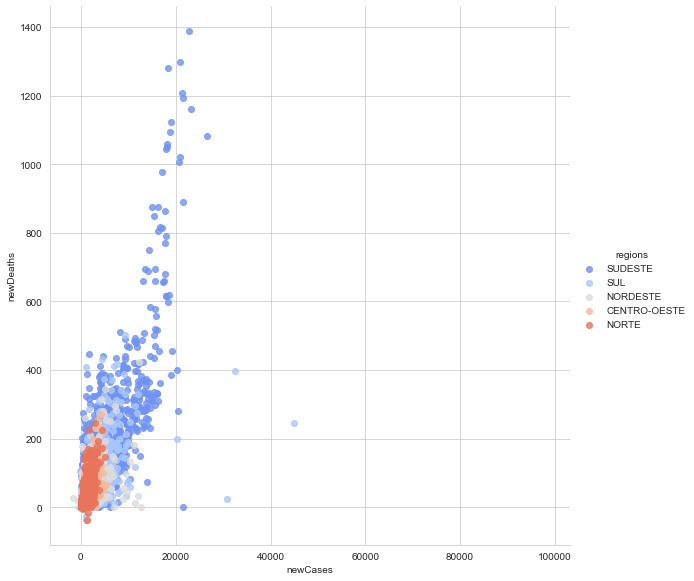

In [23]:
sns.set_style('whitegrid')
sns.lmplot(x='newCases', y='newDeaths', data=dataStates, hue='regions', fit_reg=False, height=8, palette='coolwarm')

<span style='color:#3385ff'> **Removing values less than 0** </span>

In [24]:
def data(x):
    if x < 0:
        return 0
    return x

dataStates['newDeaths'] = dataStates['newDeaths'].apply(data) 
dataStates['newCases'] = dataStates['newCases'].apply(data) 

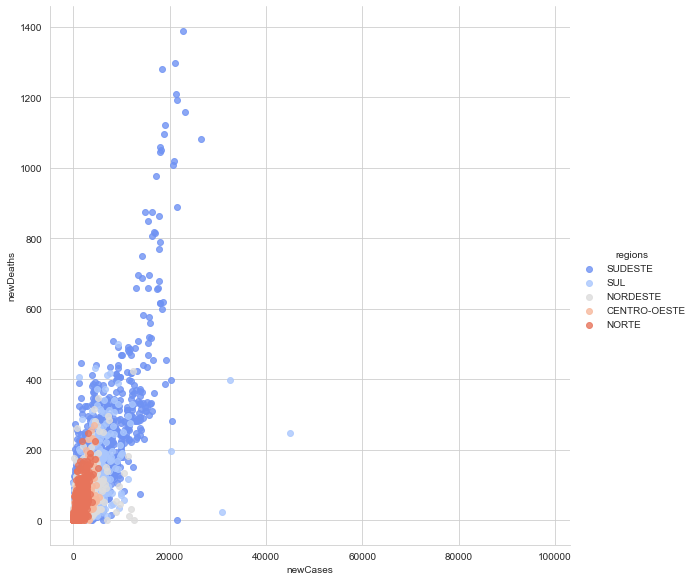

In [25]:
sns.set_style('whitegrid')
sns.lmplot(x='newCases', y='newDeaths', data=dataStates, hue='regions', fit_reg=False, height=8, palette='coolwarm')

### New Cases by Regions

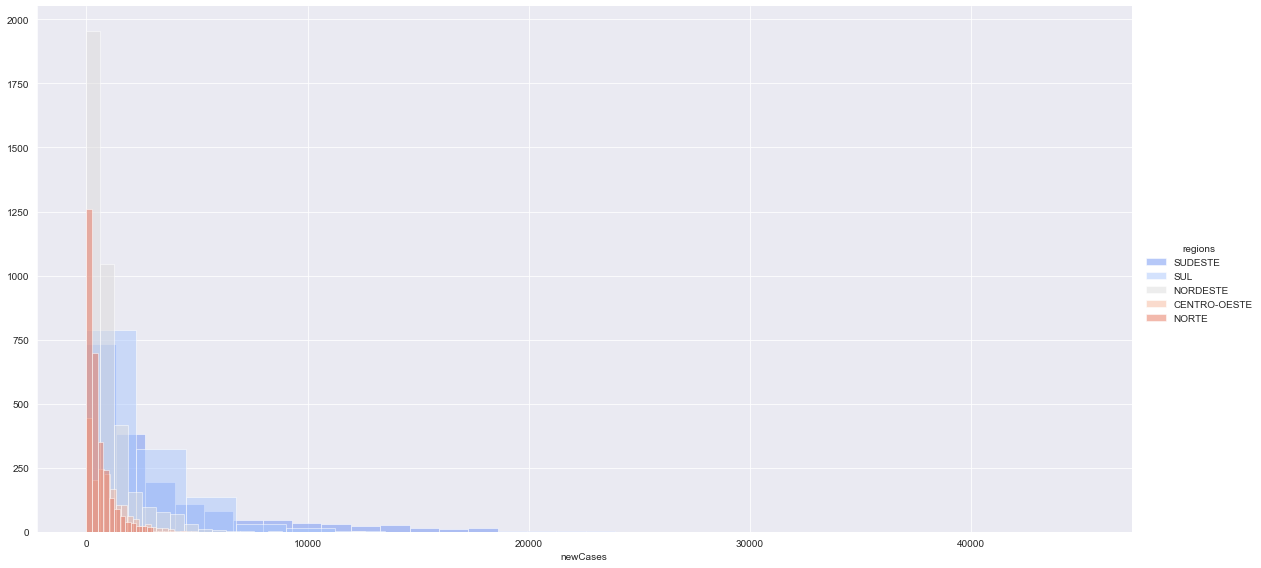

In [26]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'newCases', bins=20, alpha=0.5)
dg.add_legend()

### Total Cases by Regions

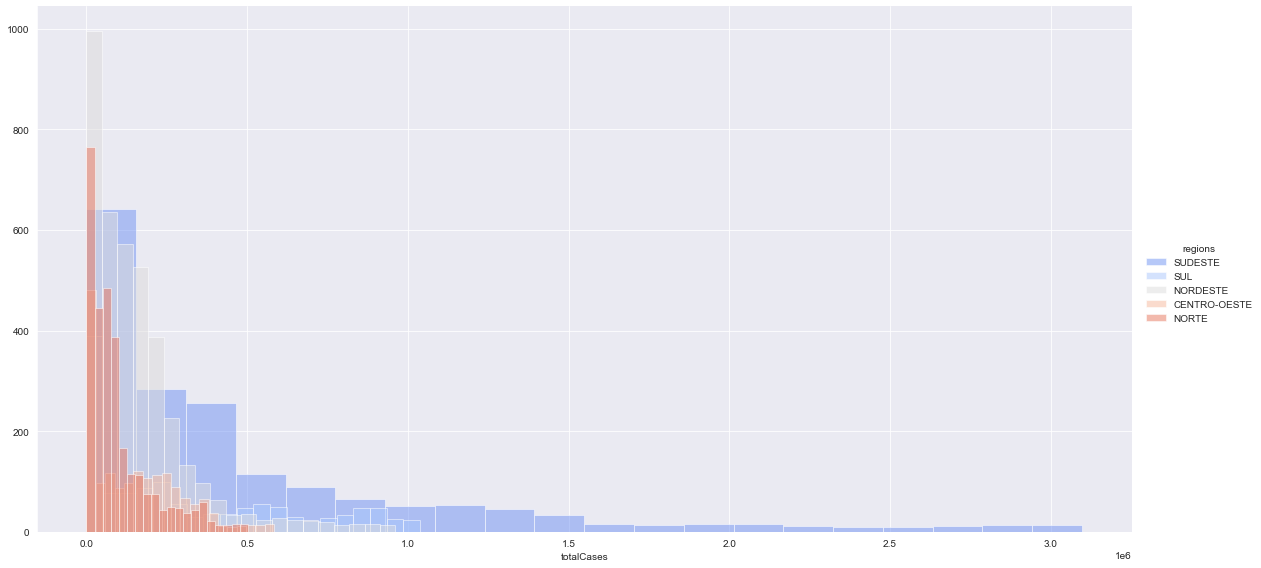

In [27]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'totalCases', bins=20, alpha=0.5)
dg.add_legend()

### New Deaths by Regions

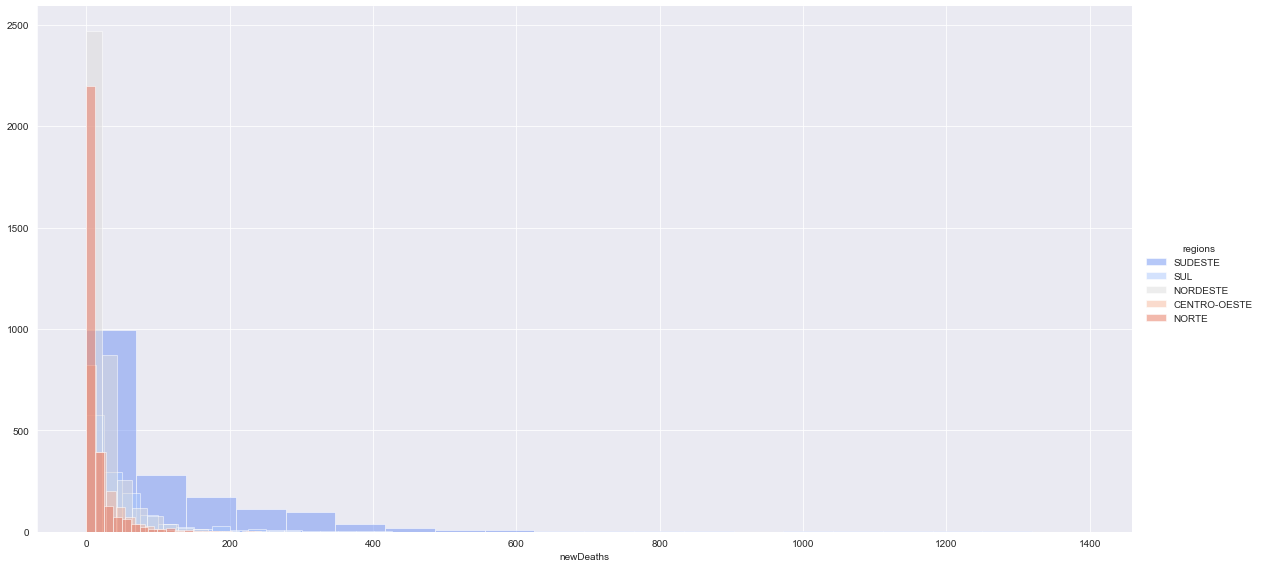

In [28]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'newDeaths', bins=20, alpha=0.5)
dg.add_legend()

### Total Deaths by Regions

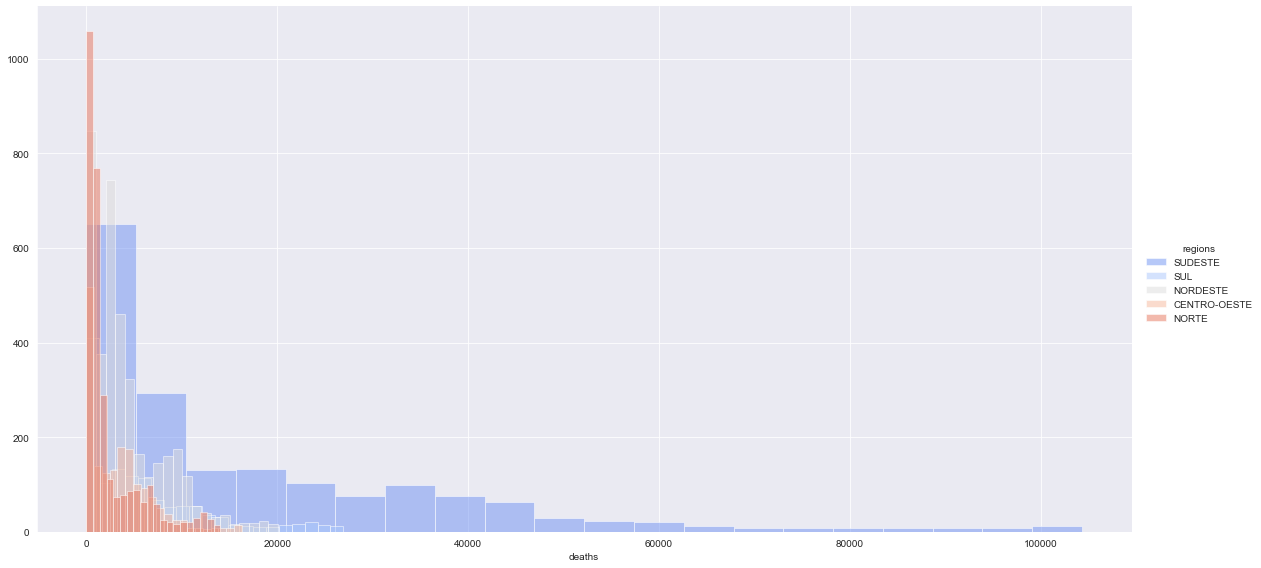

In [29]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'deaths', bins=20, alpha=0.5)
dg.add_legend()

# K Means 

In [30]:
from sklearn.cluster import KMeans

In [65]:
dataCities

,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,date,newCases,newDeaths,regions,clusters
0,GO,Abadia de Goiás/GO,5200050,27,1333,301.40656,14880.55370,2.026,2021-05-18,0,0,CENTRO-OESTE,0
1,MG,Abadia dos Dourados/MG,3100104,13,363,185.55524,5181.27319,3.581,2021-05-18,0,0,SUDESTE,0
2,GO,Abadiânia/GO,5200100,27,352,131.95836,1720.34602,7.670,2021-05-18,0,0,CENTRO-OESTE,0
3,PA,Abaetetuba/PA,1500107,203,7407,127.60875,4656.14785,2.741,2021-05-18,0,0,NORTE,0
4,MG,Abaeté/MG,3100203,25,996,107.52688,4283.87097,2.510,2021-05-18,0,0,SUDESTE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,RS,Áurea/RS,4301552,3,181,84.86563,5120.22631,1.657,2021-05-18,0,0,SUL,0
5592,PR,Ângulo/PR,4101150,6,280,204.77816,9556.31399,2.143,2021-05-18,0,0,SUL,0
5593,BA,Érico Cardoso/BA,2900504,2,232,18.93939,2196.96970,0.862,2021-05-18,0,0,NORDESTE,0
5594,PA,Óbidos/PA,1505106,110,5990,210.30092,11451.84109,1.836,2021-05-18,0,0,NORTE,0


In [161]:
X2 = dataCities[['totalCases','deaths']].iloc[:][:].values

inertia = []

for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

(Text(0.5, 0, 'Número de Clusters'),
 Text(0, 0.5, 'Soma das distâncias Q intra Clusters'))

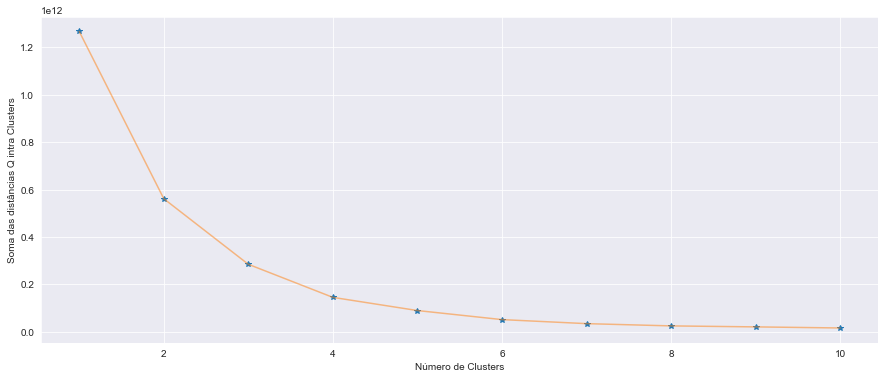

In [162]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, '*')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das distâncias Q intra Clusters')

In [163]:
algorithm = KMeans(n_clusters=3)

In [164]:
algorithm.fit(X2)

KMeans(n_clusters=3)

In [165]:
algorithm.cluster_centers_

array([[2.03158896e+03, 5.11231129e+01],
       [5.73499500e+05, 1.87455000e+04],
       [1.07902767e+05, 3.84876667e+03]])

### K means analysis - totalCases x deaths

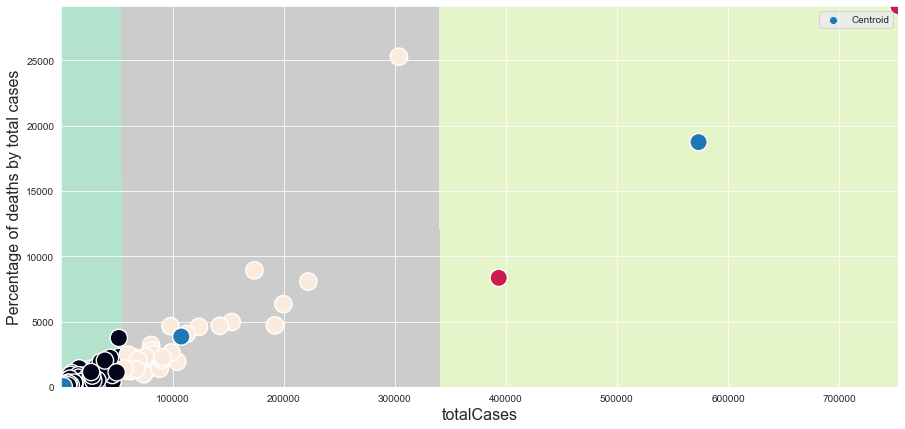

In [166]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 30
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7))
plt.clf()
Z2 = Z.reshape(xx.shape)

plt.imshow(Z2 , interpolation='nearest', extent=(xx.min() + 5, xx.max() + 5, yy.min(), yy.max() + 10), 
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
sns.scatterplot(x='totalCases', y='deaths', data = dataCities , s = 300, alpha=1, c = labels2)
sns.scatterplot(x=centroids2[: , 0] , y=centroids2[: , 1] , s = 300, alpha=1, legend="full",
                hue=['Centroid', 'Centroid', 'Centroid'])

plt.xlabel('totalCases',fontsize=16)
plt.ylabel('Percentage of deaths by total cases',fontsize=16)
plt.show()


In [167]:
dataCities['clusters'] = algorithm.labels_
df_groupby = dataCities.drop(columns= ['state','city','ibgeID',
                                      'deaths_per_100k_inhabitants',
                                      'totalCases_per_100k_inhabitants','deaths_by_totalCases',
                                      'date','newCases','newDeaths']).groupby('clusters')

In [168]:
df_groupby.describe()

deaths                                                         \
           count          mean           std     min       25%      50%   
clusters                                                                  
0         5564.0     51.123113    145.531624     0.0      6.00     14.0   
1            2.0  18745.500000  14708.528155  8345.0  13545.25  18745.5   
2           30.0   3848.766667   4516.652298   960.0   1944.50   2388.5   

                            totalCases                                \
               75%      max      count           mean            std   
clusters                                                               
0            37.00   3741.0     5564.0    2031.588965    4546.456407   
1         23945.75  29146.0        2.0  573499.500000  254372.472144   
2          4631.75  25289.0       30.0  107902.766667   58574.931461   

                                                              
               min        25%       50%        75%       max  
clusters                                                      
0              0.0     301.00     678.0    1715.00   53418.0  
1         393631.0  483565.25  573499.5  663433.75  753368.0  
2          56510.0   69989.50   85471.0  121057.75  303874.0

## Test

In [169]:
#exemplo
df = pd.DataFrame.from_dict({'deaths':[7000,4000,12,5],'totalCases':[5000000,238888,24,25]})

#executa o teste
results = algorithm.predict(df)

df['clusters'] = results
df

,deaths,totalCases,clusters
0,7000,5000000,2
1,4000,238888,0
2,12,24,0
3,5,25,0
